In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import RXGate, RZGate, HGate, CXGate, SXGate
from qiskit.dagcircuit import DAGCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.converters import circuit_to_dag
from qiskit.providers.fake_provider import FakeBelemV2
from qiskit.transpiler import InstructionProperties, PassManagerConfig, PassManager
from qiskit.transpiler.preset_passmanagers import level_1_pass_manager
from qiskit.circuit import Parameter, Instruction

import numpy as np

In [4]:
from normalize_rx_angle import NormalizeRXAngle

SyntaxError: invalid syntax (658745864.py, line 1)

In [3]:
backend = FakeBelemV2()

# adding RX gates to backend
rx_properties = {(i,): InstructionProperties() for i in range(backend.num_qubits)}
backend.target.add_instruction(RXGate(Parameter("theta")), properties=rx_properties)

In [4]:
config = PassManagerConfig.from_backend(backend=backend, seed_transpiler=230804)
original_pm = level_1_pass_manager(config)
pm_with_rx_angle_pass = level_1_pass_manager(config)

In [5]:
pm_with_rx_angle_pass.stages
pm_with_rx_angle_pass.post_optimization = PassManager(NormalizeRXAngle(backend.target))

In [6]:
# pm_with_rx_angle_pass.passes()

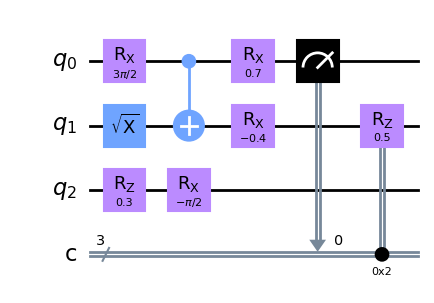

In [7]:
# some random circuit
q = QuantumRegister(3, "q")
c = ClassicalRegister(3, "c")
circ = QuantumCircuit(q, c)
circ.rx(1.5 * np.pi, q[0])
circ.sx(q[1])
circ.cx(q[0], q[1])
circ.rx(0.7, q[0])
circ.rx(-0.4, q[1])
circ.rz(0.3, q[2])
circ.rx(-np.pi / 2, q[2])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1]).c_if(c, 2)
circ.draw(output="mpl")

In [10]:
# transpiled_circuit = pm_with_rx_angle_pass.run(circ)
transpiled_circuit = original_pm.run(circ)

In [19]:
transpiled_circuit[0]

CircuitInstruction(operation=Instruction(name='rx', num_qubits=1, num_clbits=0, params=[-1.5707963267948968]), qubits=(Qubit(QuantumRegister(5, 'q'), 0),), clbits=())

In [22]:
transpiled_circuit[0].operation.params

[-1.5707963267948968]

In [11]:
dag = circuit_to_dag(transpiled_circuit)

In [12]:
dag.find_bit(op_node.qargs)

AttributeError: 'DAGCircuit' object has no attribute 'find_bit'

In [16]:
for op_node in dag.op_nodes():
    print(op_node.op)

Instruction(name='rx', num_qubits=1, num_clbits=0, params=[-1.5707963267948968])
Instruction(name='rx', num_qubits=1, num_clbits=0, params=[1.5707963267948966])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='rx', num_qubits=1, num_clbits=0, params=[0.7])
Instruction(name='rx', num_qubits=1, num_clbits=0, params=[-0.4])
Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.2999999999999998])
Instruction(name='rx', num_qubits=1, num_clbits=0, params=[-1.5707963267948966])
Instruction(name='measure', num_qubits=1, num_clbits=1, params=[])
Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.5])


In [12]:
dag.properties()

NameError: name 'dag' is not defined

In [13]:
backend.target.operation_names

dict_keys(['id', 'rz', 'sx', 'x', 'cx', 'reset', 'measure', 'delay', 'rx'])

In [20]:
backend.target.has_calibration("sx", (0,))

True

In [29]:
circ.count_ops()["rx"]

4

In [35]:
transpiled_circuit.calibrations["rx"]

{}